### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\PC\\AdaBoost\\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### . Here we are having total of 8124 records & 23 columns out of which 1 is output and remaining 22 are input variables.

### EDA 

<AxesSubplot:xlabel='class', ylabel='count'>

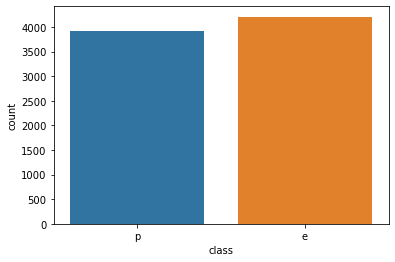

In [6]:
sns.countplot(data=df, x="class")

In [7]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

###### - Here the data is balanced. 

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### - There are no null values in the data. 

### Data Manipulation 

###### - The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

###### - This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.info() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach. 

In [10]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

###### - Now that we have converted the columns to be of category type, we can use LabelEncoder to make the columns into machine understandable format. 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


###### - From the above figure we can see that 'veil-type' has only one unique value and hence won't contribute anything to the data. So we can remove it. 

In [13]:
df = df.drop(["veil-type"],axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### Create X & Y 

In [14]:
x = df.drop(["class"], axis=1)
y = df["class"]

### Preparing the data
###### - Split data for train and test.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Modeling 

###### - AdaBoost classifier with default parameters.

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)

AdaBoostClassifier()

### Prediction 

In [17]:
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

### Evaluation 

###### 1. Accuracy 

In [18]:
from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("Test accuracy:", accuracy_score(y_test, ypred_test))

Train accuracy: 1.0
Test accuracy: 1.0


###### 2. Confusion Matrix 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


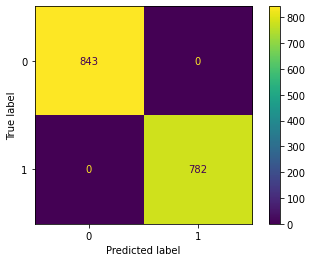

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)
plt.show()

###### 3. Classification Report 

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



###### 4. Cross Validation Score 

In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,x,y,cv=5)
print("Cross Validation Score:", score.mean())

Cross Validation Score: 0.9172607805987116


### Selecting Important Features 

In [22]:
model.feature_importances_

array([0.02, 0.  , 0.04, 0.  , 0.14, 0.  , 0.08, 0.04, 0.04, 0.02, 0.06,
       0.1 , 0.04, 0.  , 0.02, 0.02, 0.  , 0.02, 0.18, 0.14, 0.04])

In [23]:
f_imp = pd.DataFrame(index=x.columns, data=model.feature_importances_, columns=['Feature Importance'])

In [24]:
f_imp[f_imp['Feature Importance'] > 0]

,Feature Importance
cap-shape,0.02
cap-color,0.04
odor,0.14
gill-spacing,0.08
gill-size,0.04
gill-color,0.04
stalk-shape,0.02
stalk-root,0.06
stalk-surface-above-ring,0.10
stalk-surface-below-ring,0.04


###### - So these are the columns where values > 0 and remaining have been ignored.
###### - We can select these columns for modelling purpose.

### Analyzing performance as more weak learners are added 

In [26]:
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,96))}
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_

{'n_estimators': 28}

### Final Model 

In [30]:
final_model = AdaBoostClassifier(n_estimators=28)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)

print("Train accuracy score:", accuracy_score(y_train, pred_train))
print("Test accuracyscore:", accuracy_score(y_test, pred_test))

Train accuracy score: 1.0
Test accuracyscore: 1.0


### Feature Importance 

In [31]:
final_model.feature_importances_

array([0.        , 0.        , 0.07142857, 0.        , 0.17857143,
       0.        , 0.07142857, 0.07142857, 0.07142857, 0.03571429,
       0.03571429, 0.10714286, 0.07142857, 0.        , 0.03571429,
       0.        , 0.        , 0.        , 0.14285714, 0.07142857,
       0.03571429])

In [32]:
feature_imp = pd.DataFrame(index=x.columns, data=final_model.feature_importances_, columns=['Feature Importance'])

In [35]:
feature_imp[feature_imp['Feature Importance'] > 0]

,Feature Importance
cap-color,0.071429
odor,0.178571
gill-spacing,0.071429
gill-size,0.071429
gill-color,0.071429
stalk-shape,0.035714
stalk-root,0.035714
stalk-surface-above-ring,0.107143
stalk-surface-below-ring,0.071429
stalk-color-below-ring,0.035714


In [34]:
feature_imp.sort_values("Feature Importance")

,Feature Importance
cap-shape,0.000000
cap-surface,0.000000
ring-type,0.000000
bruises,0.000000
ring-number,0.000000
gill-attachment,0.000000
veil-color,0.000000
stalk-color-above-ring,0.000000
stalk-color-below-ring,0.035714
stalk-root,0.035714


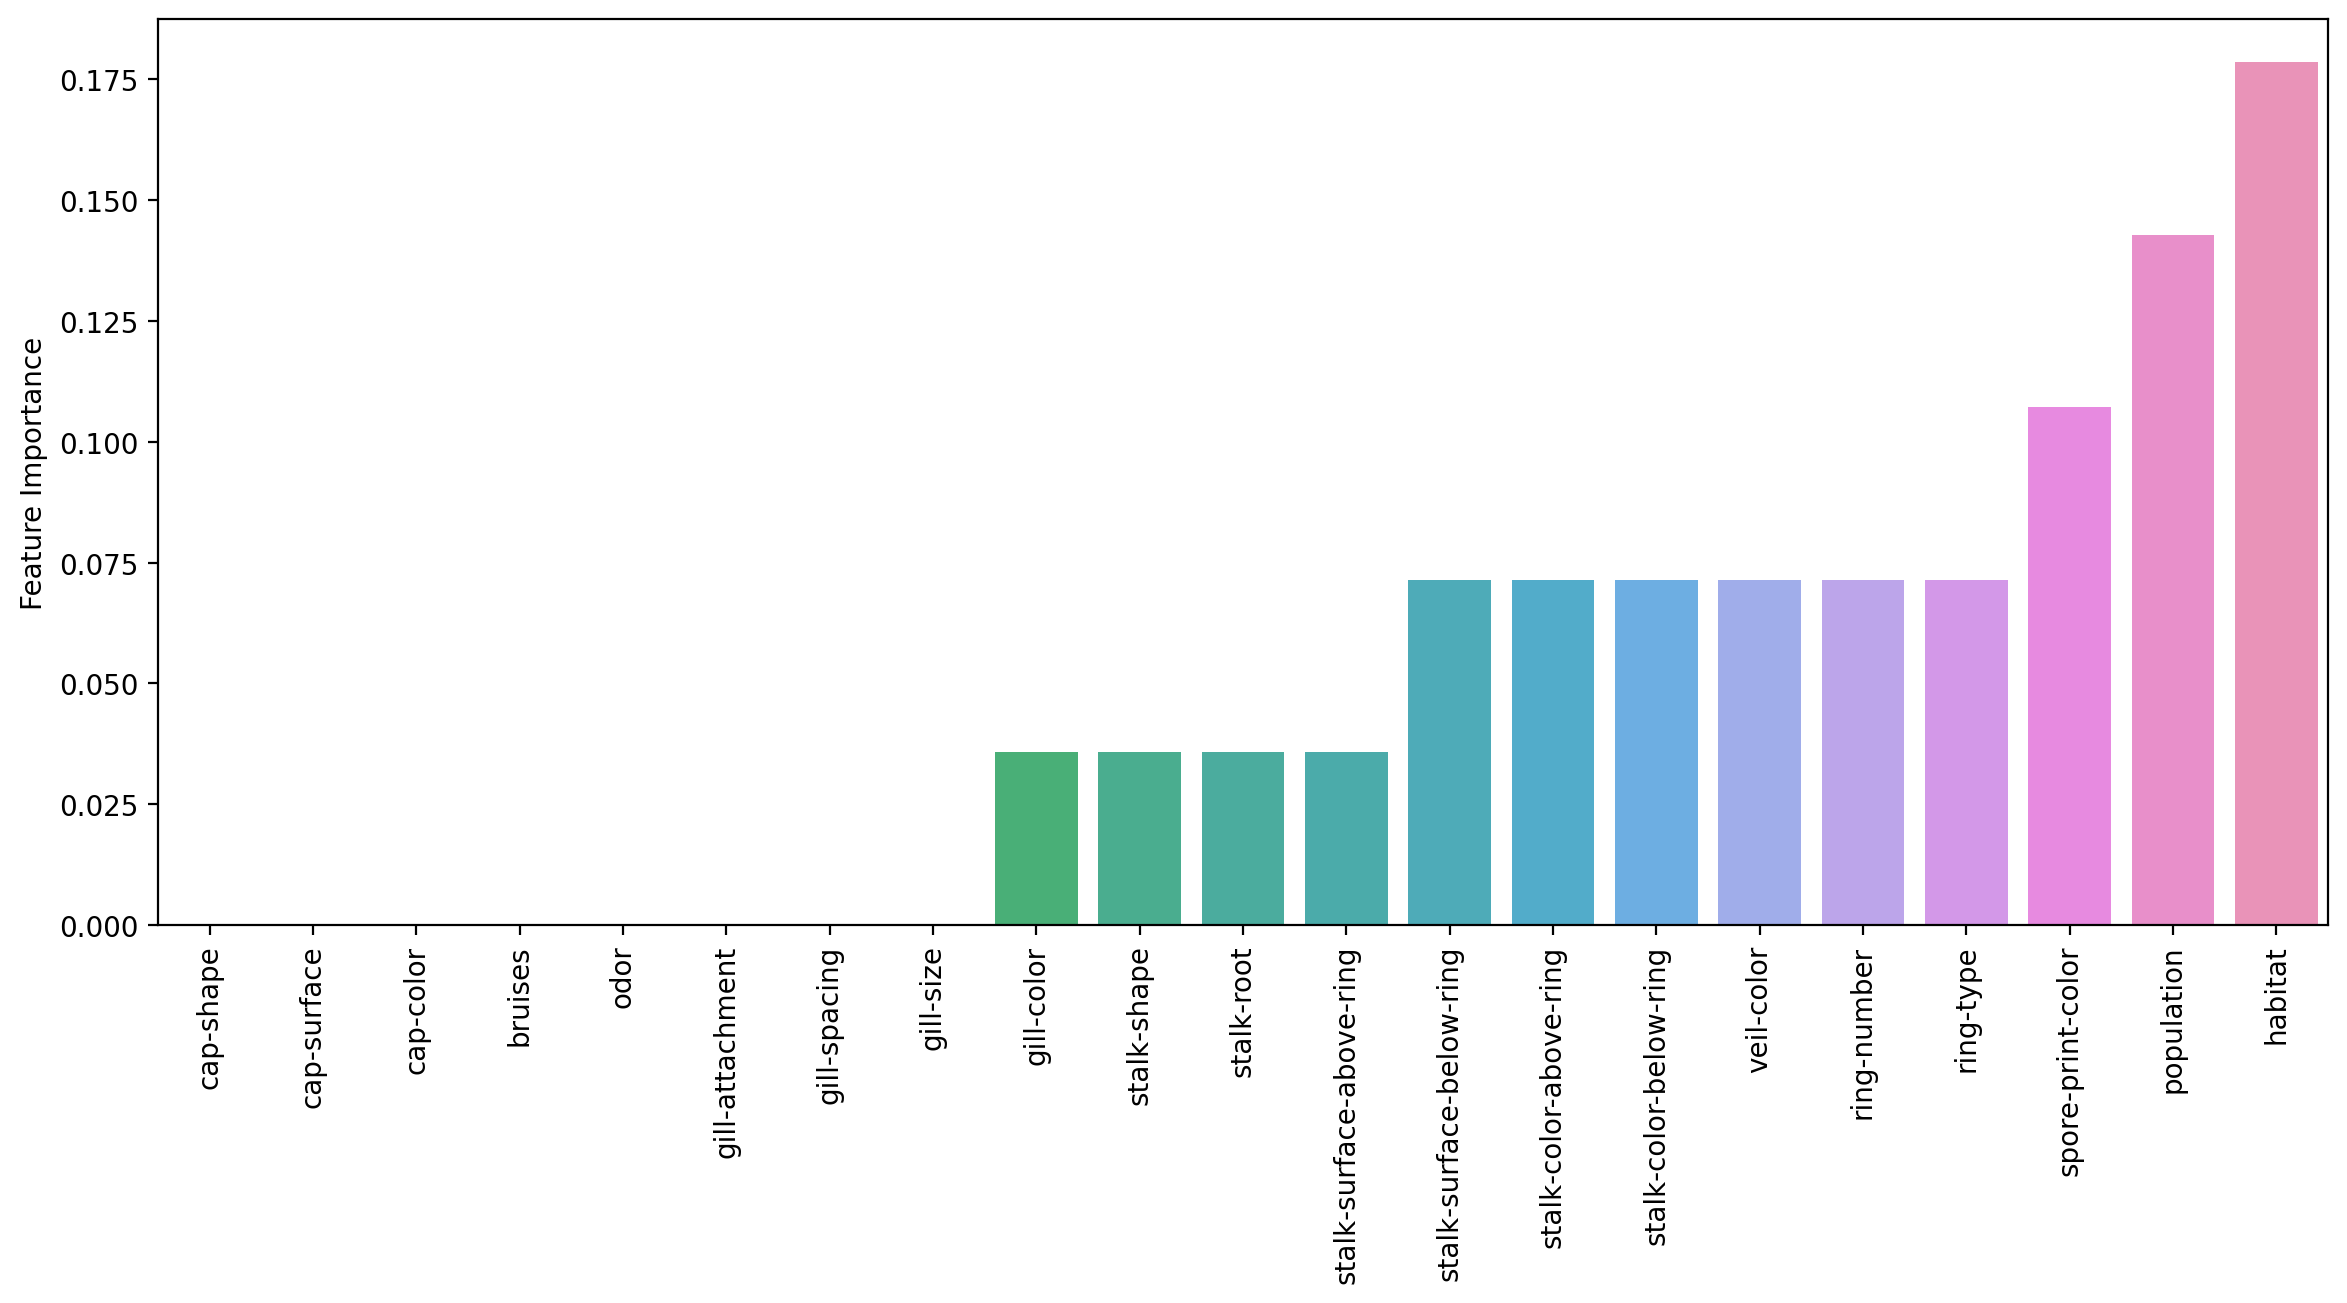

In [36]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=feature_imp.sort_values("Feature Importance"), x=feature_imp.index, y="Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [38]:
import pickle
file_name = "AdaBoost.pkl"
pickle.dump(model, open(file_name,'wb'))